In [13]:
import os
import pandas as pd
import numpy as np
import pickle 
import warnings
import timeit
warnings.filterwarnings('ignore')

# 1. import data 
There are several data features extracted from the original images

In [2]:
siftpath=os.path.expanduser("~\Documents\GitHub\Spring2018-Project3-Group4\data\\train\SIFT_train.csv")
orb_path=os.path.expanduser("~\AppData\Local\Temp\\tmp0lxurr6y")
rgbpath=os.path.expanduser("~\Documents\GitHub\Spring2018-Project3-Group4\data\\rgbftr.txt")
label_path=os.path.expanduser("~\Documents\GitHub\Spring2018-Project3-Group4\data\\train\label_train.csv")
label=pd.read_csv(label_path)

### sift feature

In [3]:
sift_feature=pd.read_csv(siftpath,header=None)
sift_feature.insert(loc=0, column='label', value=label.label)

In [4]:
sift_feature.head()

,label,0,1,2,3,4,5,6,7,8,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,1,img_1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.007874,0.000000,0.0,0.000000,0.0,0.000000
1,1,img_2,0.014085,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
2,1,img_3,0.000000,0.003247,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.003247,0.000000,0.0,0.000000,0.0,0.000000
3,1,img_4,0.000000,0.000000,0.0,0.0,0.002037,0.0,0.000000,0.002037,...,0.0,0.0,0.0,0.004073,0.000000,0.002037,0.0,0.000000,0.0,0.002037
4,1,img_5,0.005535,0.001845,0.0,0.0,0.000000,0.0,0.001845,0.000000,...,0.0,0.0,0.0,0.001845,0.000000,0.001845,0.0,0.001845,0.0,0.000000


### orb feature

In [5]:
with open(orb_path,"br") as f:
    orbfeature=pickle.load(f)
orbfeature=np.array(orbfeature)
orbfeature=pd.DataFrame(orbfeature)
orbfeature.insert(loc=0, column='label', value=label.label)
orbfeature.insert(loc=1, column='img', value=list(range(1,3001)))

In [6]:
orbfeature.head()

,label,img,0,1,2,3,4,5,6,7,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001980,0.0,0.001980,0.000000,0.000000,0.0,0.000000,0.005941,0.000000
1,1,2,0.000000,0.000587,0.000000,0.001762,0.000587,0.000000,0.000000,0.000000,...,0.002349,0.000000,0.0,0.000587,0.000587,0.000000,0.0,0.000000,0.000000,0.000000
2,1,3,0.000000,0.000000,0.000000,0.001326,0.000000,0.000000,0.006631,0.001326,...,0.006631,0.001326,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.001326
3,1,4,0.001226,0.000000,0.000000,0.002452,0.000000,0.001839,0.001226,0.000000,...,0.000613,0.000000,0.0,0.000000,0.000000,0.000613,0.0,0.000000,0.000000,0.000000
4,1,5,0.001559,0.000000,0.000312,0.001247,0.000000,0.001247,0.000312,0.001247,...,0.002182,0.000312,0.0,0.000000,0.000000,0.000312,0.0,0.001247,0.000312,0.000312


### rgb_feature

In [7]:
rgb_feature=pd.read_csv(rgbpath)
cols=rgb_feature.columns.tolist()
cols=cols[-1:]+cols[:-1]
rgb_feature=rgb_feature[cols]

In [8]:
rgb_feature.head()

,label,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,...,X1431,X1432,X1433,X1434,X1435,X1436,X1437,X1438,X1439,X1440
0,1,1,0.000014,0.000938,0.002409,0.000350,0.000000,0.000000,0.000000,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.004762,0.351891
1,1,2,0.002623,0.005427,0.002163,0.000360,0.000044,0.000000,0.000000,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.009039,0.093690
2,1,3,0.001878,0.003044,0.000256,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,1,4,0.078483,0.001231,0.000167,0.000012,0.000000,0.000000,0.000000,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000283,0.000104
4,1,5,0.116950,0.051410,0.039697,0.029717,0.013412,0.002864,0.000217,0.000015,...,0,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.000206,0.000018


# 2 Logistic Regression based on 3 features

In [9]:
#cross-validation 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [10]:
def GetCvScore(model,data,k=5): # five-fold cross-validation
    '''this function implement the cross validation for all models
        input:
            data: sift_feature and ORB feature and RGB feature
            model: sklearn model type
            k: number of the folders
        output:
            average cv scores 
            average running time for 1 folder     
    '''
    seqindx=np.repeat(range(k),data.shape[0]/k) # generate a sequence
    np.random.shuffle(seqindx) # shuffle the sequence
    cvscore=[]
    cvtime=[]
    for i in range(k):
        X=data.iloc[seqindx!=i,2:]
        y=data.iloc[seqindx!=i,0]
        clf = model
        start_time = timeit.default_timer() # start_time
        clf.fit(X, y) # train the model
        thisscore=clf.score(data.iloc[seqindx==i,2:],data.iloc[seqindx==i,0])
        elapsed = timeit.default_timer() - start_time # elapsed time 
        cvtime.append(elapsed)
#         print("the score for the fold {} is {}".format(i,thisscore))
        cvscore.append(thisscore)
    avg_score=sum(cvscore)/k
    avg_time=sum(cvtime)/k
    print("this model: avg score is {} avg_time {} ".format(avg_score,avg_time))
    return [avg_score,avg_time]

#### Fine tune list for logistic regression 

In [11]:
tune_list=[10**i for i in range(-5,6)]
tune_list # tune parameter for cost

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

## 2.1 sift_feature
We also run the logistical regression with l1 penealty we found that the accuracy is not as good as L2

### l2 penalty

In [15]:
my_score=np.empty((len(tune_list),2))
for i in range(len(tune_list)):
    cost=tune_list[i]
    my_score[i]=GetCvScore(LogisticRegression(penalty='l2',C=cost),data=sift_feature)

this model: avg score is 0.31966666666666665 avg_time 0.18053152021805943 
this model: avg score is 0.31933333333333336 avg_time 0.2867233996813937 
this model: avg score is 0.31666666666666665 avg_time 0.21312714384703355 
this model: avg score is 0.35 avg_time 0.1869217587371324 
this model: avg score is 0.3426666666666667 avg_time 0.19325349466810024 
this model: avg score is 0.5606666666666666 avg_time 0.2715170754941852 
this model: avg score is 0.6396666666666666 avg_time 0.32862996046357296 
this model: avg score is 0.7126666666666667 avg_time 0.4874881179438432 
this model: avg score is 0.719 avg_time 0.622118819330798 
this model: avg score is 0.6963333333333334 avg_time 1.0275420010428733 
this model: avg score is 0.6819999999999999 avg_time 1.8618580766597248 


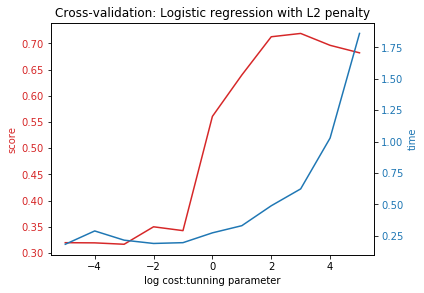

In [16]:
t = np.log10(tune_list)
data1 =  my_score[:,0]
data2 = my_score[:,1]
fig, ax1 = plt.subplots()

color1 = 'tab:red'
ax1.set_xlabel('log cost:tunning parameter')
ax1.set_ylabel('score', color=color1)
ax1.plot(t, data1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel('time', color=color2)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Cross-validation: Logistic regression with L2 penalty')
plt.show()

In [17]:
np.max(my_score[:,0])#  max_score for logistic with L2 penalty

0.71899999999999997

In [18]:
GetCvScore(LogisticRegression(penalty='l2',C=1000,multi_class="multinomial",solver="sag",n_jobs=-1),data=sift_feature)

this model: avg score is 0.7310000000000001 avg_time 9.497900429907869 


[0.73100000000000009, 9.497900429907869]

## 2.2 rgb_feature
### l2 penalty

In [19]:
my_score=np.empty((len(tune_list),2))
for i in range(len(tune_list)):
    cost=tune_list[i]
    my_score[i]=GetCvScore(LogisticRegression(penalty='l2',solver="sag",C=cost,n_jobs=-1),data=rgb_feature)

this model: avg score is 0.31833333333333336 avg_time 1.31327266185545 
this model: avg score is 0.325 avg_time 1.4779780422473947 
this model: avg score is 0.32433333333333336 avg_time 1.3657585090291264 
this model: avg score is 0.4293333333333333 avg_time 1.4570162285194725 
this model: avg score is 0.5336666666666667 avg_time 1.5953861724661238 
this model: avg score is 0.643 avg_time 1.677469816397877 
this model: avg score is 0.6906666666666668 avg_time 1.73488128610515 
this model: avg score is 0.7153333333333334 avg_time 5.154810237870867 
this model: avg score is 0.7230000000000001 avg_time 5.221291085657873 
this model: avg score is 0.7186666666666668 avg_time 5.98980217017525 
this model: avg score is 0.7233333333333333 avg_time 5.202098298296721 


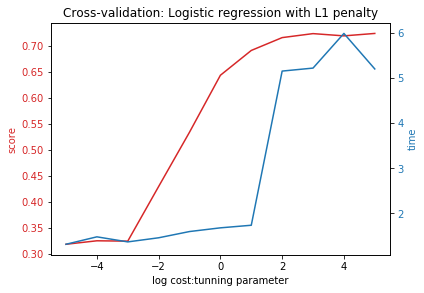

In [20]:
t = np.log10(tune_list)
data1 =  my_score[:,0]
data2 = my_score[:,1]
fig, ax1 = plt.subplots()

color1 = 'tab:red'
ax1.set_xlabel('log cost:tunning parameter')
ax1.set_ylabel('score', color=color1)
ax1.plot(t, data1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel('time', color=color2)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Cross-validation: Logistic regression with L1 penalty')
plt.show()

In [21]:
np.max(my_score[:,0])#  max_score for logistic with L2 penalty

0.72333333333333327

### l1 penalty 

In [22]:
GetCvScore(LogisticRegression(penalty='l1',solver='liblinear',C=100,n_jobs=-1),data=rgb_feature)

this model: avg score is 0.7356666666666667 avg_time 14.597713804190278 


[0.73566666666666669, 14.597713804190278]

In [23]:
my_score=np.empty((len(tune_list),2))
for i in range(len(tune_list)):
    cost=tune_list[i]
    my_score[i]=GetCvScore(LogisticRegression(penalty='l1',solver="liblinear",C=cost,n_jobs=-1),data=rgb_feature)

this model: avg score is 0.3333333333333333 avg_time 0.16157069192644258 
this model: avg score is 0.33333333333333337 avg_time 0.14853126093589708 
this model: avg score is 0.3333333333333333 avg_time 0.15686160281501316 
this model: avg score is 0.31766666666666665 avg_time 0.16461454958546257 
this model: avg score is 0.402 avg_time 0.20261866774098963 
this model: avg score is 0.6693333333333333 avg_time 0.2597851322195311 
this model: avg score is 0.728 avg_time 0.8533379500873594 
this model: avg score is 0.7306666666666667 avg_time 13.411952086954694 
this model: avg score is 0.7023333333333333 avg_time 25.74128251950051 
this model: avg score is 0.6839999999999999 avg_time 98.99671491147282 
this model: avg score is 0.6503333333333334 avg_time 367.46051382995444 


In [24]:
np.max(my_score[:,0])

0.73066666666666669

## 2.3 orbfeature

In [25]:
my_score=np.empty((len(tune_list),2))
for i in range(len(tune_list)):
    cost=tune_list[i]
    my_score[i]=GetCvScore(LogisticRegression(penalty='l2',solver="liblinear",C=cost,n_jobs=-1),data=orbfeature)

this model: avg score is 0.30266666666666664 avg_time 0.1555045561044608 
this model: avg score is 0.312 avg_time 0.155501192000429 
this model: avg score is 0.31866666666666665 avg_time 0.1756469233425378 
this model: avg score is 0.311 avg_time 0.19054276535080134 
this model: avg score is 0.376 avg_time 0.22204201929944248 
this model: avg score is 0.6136666666666666 avg_time 0.34409499244911784 
this model: avg score is 0.696 avg_time 0.4469061936025355 
this model: avg score is 0.7706666666666667 avg_time 0.6521411495964458 
this model: avg score is 0.8140000000000001 avg_time 0.9575967005524945 
this model: avg score is 0.8146666666666667 avg_time 1.582779480114641 
this model: avg score is 0.7953333333333333 avg_time 2.0676074944030916 


In [26]:
my_score=np.empty((len(tune_list),2))
for i in range(len(tune_list)):
    cost=tune_list[i]
    my_score[i]=GetCvScore(LogisticRegression(penalty='l1',solver="liblinear",C=cost,n_jobs=-1),data=orbfeature)

this model: avg score is 0.33333333333333337 avg_time 0.1890494314047828 
this model: avg score is 0.3333333333333333 avg_time 0.2102471426655029 
this model: avg score is 0.3333333333333333 avg_time 0.19348438707065724 
this model: avg score is 0.3166666666666666 avg_time 0.22096009065035105 
this model: avg score is 0.32 avg_time 0.232923910943191 
this model: avg score is 0.41 avg_time 0.24736289122574817 
this model: avg score is 0.7166666666666668 avg_time 0.4161348168759105 
this model: avg score is 0.8016666666666667 avg_time 7.628520298879994 
this model: avg score is 0.768 avg_time 14.187437697410314 
this model: avg score is 0.7646666666666666 avg_time 2.0244831279930624 
this model: avg score is 0.7793333333333333 avg_time 0.9740677637202679 


# conclusion for logistic regression

The accuracy for all the fine-tuned model for logistic regression is around 70-80% <br>
There are several things to consider: <br>
1. Regularization method <br>
   1.1 L1 penalty:  $ |\beta|^{1}_1 $ Norm of parameter  <br>
   1.2 L2 penalty: $ |\beta|^{2}_2 $  unit length <br>
2. Feature <br>
    Sift_feature <br>
    Orb_feature <br>
    Rgb_feature <br>
3. Tunning parameter:<br>
This represent the degree of penalty, in this case, the larger the value for c, the less we penalize.


### best model for logistic regression  0.82 

The best model:
1. orbfeature 
2. l2 penalty
3. lilinear method 
4. cost=1000 <br><br>
Performance: <br>
The corresponding time is 1 second per run
5-fold cv-score is 0.82

In [27]:
# end

In [30]:
from sklearn import metrics
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
metrics.precision_score(y_true, y_pred, average='macro')  

0.22222222222222221

In [34]:
metrics.precision_score(y_true, y_pred, average='micro')

0.33333333333333331

In [35]:
metrics.precision_score(y_true, y_pred, average='samples')

ValueError: Sample-based precision, recall, fscore is not meaningful outside multilabel classification. See the accuracy_score instead.